In [1]:
import keras
# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist
# Cargue la división de entrenamiento y de prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Label: 0
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

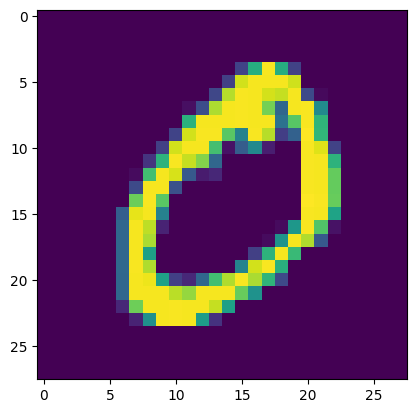

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Puedes poner aquí entre 0 y 59999
index = 1
# Imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
#Visualiza la imagen
plt.imshow(training_images[index])

In [3]:
# Normalizar los valores de pixeles del tren y probar las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

In [4]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [5]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2574 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1114 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0583 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0439 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0355 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0290 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0194 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

<Axes: >

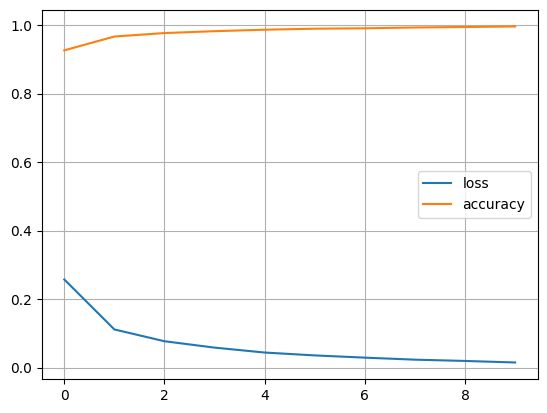

In [8]:
# Graficar el historial de entrenamiento
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [9]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102 - accuracy: 0.9973
Pérdida en el conjunto de entrenamiento: 0.010201739147305489
Precisión en el conjunto de entrenamiento: 0.9972666501998901
313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9785
Pérdida en el conjunto de prueba: 0.07877934724092484
Precisión en el conjunto de prueba: 0.9785000085830688
